# Изучение рынка заведений общественного питания Москвы

- Автор: Владимир Добров
- Дата: 2025-04-26

### Цели и задачи проекта


Для инвестфонда Shut Up and Take My Money провести исследовательский анализ рынка Москвы по выбору подходящего места на предмет открытия заведения общественного питания. Тип заведения пока не определён: кафе, ресторан или бар. Расположение, меню и цены пока тоже обсуждаются.

### Описание данных


Для анализа использованы данные датасета с заведениями общественного питания Москвы, составленного на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. 

Данные состоят из двух датасетов:

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:  

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
      и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта


1. Загрузка данных и знакомство с ними.  
2. Предобработка данных.  
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними



In [ ]:
# загружаем библиотеку phik
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


- Познакомимся с данными и изучим общую информацию о них.

In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

- Загружаем данные о заведениях общественного питания Москвы. 

In [ ]:
# Выгружаем данные в переменные rests_df и prices_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

-------
Познакомимся с данными датасета **`rest_info.csv`** — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [ ]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [ ]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


---

### Промежуточный вывод о `rest_info.csv`

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одноого вида (snake case).
- Данные столбцов `id`, `name`, `category`, `address`, `district`, `hours` содержат строковую информацию в типах данных `object`.
- Данные столбцов `rating`, `chain`, `seats` содержат числовые значения и хранятся в типах данных `int64` или `float64`.
- Значения в столбце `chain` показывает наличие у клиента того или иного признака и содержит значения 1 или 0 — размерность этих данных можно оптимизировать. 
- Значения в столбце `seats` лучше перевести в тип `int64`, так как они представлены целыми числами. 
- Пропуски содержатся только в столбце `hours` и `seats` Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.


---
Познакомимся с данными датасета **`prices_info.csv`** — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [ ]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [ ]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод о `price_info.csv`

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Датасет `price_info.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов одного вида (snake case).
- Данные столбцов `id`, `price`, `avg_bill`, содержат строковую информацию в типах данных `object`. Следует учесть, что данные столбца `avg_bill` содержит как строковую, так и цифпрвую информацию учавствующую в расчетах `avg_bill`.
- Данные столбцов `'middle_avg_bill`, `middle_coffee_cup` содержат числовые значения и хранятся в типах данных `float64`.  
- Пропуски содержатся во всех столбцах, кроме  `id` .
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которыми и продолжим работу.

In [ ]:
# Соединяем данные в единый датафрейм df
df = rest_df.merge(price_df, on='id', how='left')

In [ ]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных



In [ ]:
# Оптимизируем типы данных 
df['chain'] = pd.to_numeric(df['chain'], downcast='integer', errors='coerce')
df['seats'] = df['seats'].astype(pd.Int16Dtype())
    
# Проверяем результат
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int16  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int16(1), float64(3), int8(1), object(8)
memory usage: 820.9+ KB
None


- Изучим пропущенные значения в данных

In [ ]:
# Посчитаем абсолютное количество пропусков в каждом столбце
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [ ]:
# Подсчитываем процент строк с пропусками
df.isna().mean().round(2) * 100

id                    0.0
name                  0.0
category              0.0
address               0.0
district              0.0
hours                 6.0
rating                0.0
chain                 0.0
seats                43.0
price                61.0
avg_bill             55.0
middle_avg_bill      63.0
middle_coffee_cup    94.0
dtype: float64

- В столбце `hours` обнаружено 6%. Количество пропусков незначительно, а информацию можно заменить на наиболее часто встречающеесе значение о днях и часах работы.

- В столбце `seats` обнаружено 43% пропусков. Количество пропусков достаточно большое, чтобы их просто удалить.
Возможная причина - пользователь при заполнении формы не добавил эту информацию, так как данное поле не являлось обязательным к заполнению.
- В столбце `price` обнаружено 61% пропусков. Возможная причина - отсутствие информации о «Среднем счёте» в поле avg_bill, на основе которой определяется категория цены
- В столбце `avg_bill` обнаружено 55% пропусков. Причина - информация могла быть не добавлена пользователями или не была найдена в общедоступных источниках. Оставляем как есть, так как информация из данного поля не учавствует в расчетах.
- В столбцах `middle_avg_bill`  и `middle_coffee_cup` обнаружено 63% и 94% пропусков. Причина пропусков - «Средний счёт» и «Цена одной чашки капучино» на указана в поле `avg_bill`


Проверим данные на явные и неявные дубликаты.   
Для оптимизации проверки нормализуем данные в текстовых столбцахс названием и адресом заведения.

In [ ]:
# Определяем колонки для нормализации данных
str_column =[ 'name', 'address']

for col in str_column:
    # Сортируем значения исходных данных
    sorted_col = df[col].sort_values()

    # Приводим данные в колонке к нижнему регистру
    df[col] = sorted_col.str.lower()
    print()
    
    # Проверим результат - вывадим уникальные значения нормализованных данных
    uniq_value = df[col].sort_values().unique()
    print(f'Нормализованные данные: {col}')
    print (uniq_value)


Нормализованные данные: name
['#кешбэккафе' '+39 pizzeria mozzarella bar' '1 этаж' ... 'ё-ланч'
 'ёж и устрица' 'ёрш']

Нормализованные данные: address
['москва, 1-й автозаводский проезд, 5'
 'москва, 1-й балтийский переулок, 3/25'
 'москва, 1-й варшавский проезд, 1ас9' ...
 'москва, яузский бульвар, 11, стр. 1' 'москва, яузский бульвар, 14/8'
 'москва, № 7']


In [ ]:
# Проверяем полные дубликаты в датафрейме df
count_duplicates = df.duplicated().sum()

print(f'Количество явных дубликатов: {count_duplicates}')

Количество явных дубликатов: 0


In [ ]:
# Проверяем неявные дубликаты в датафрейме df
id_duplicates = df.duplicated(subset='id').sum()

print(f'Количество неявных дубликатов: {id_duplicates}')

Количество неявных дубликатов: 0


- Для дальнейшего анализа создаём столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [ ]:
# создаём столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7
for i in df['hours']:
    df['is_24_7'] = df['hours']=='ежедневно, круглосуточно'

# Проверим результат
print(df[['hours', 'is_24_7']])

                                                  hours  is_24_7
0                                ежедневно, 10:00–22:00    False
1                                ежедневно, 10:00–22:00    False
2     пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...    False
3                                ежедневно, 09:00–22:00    False
4                                ежедневно, 10:00–22:00    False
...                                                 ...      ...
8401                             ежедневно, 09:00–02:00    False
8402                             ежедневно, 08:00–22:00    False
8403                           ежедневно, круглосуточно     True
8404                           ежедневно, круглосуточно     True
8405                           ежедневно, круглосуточно     True

[8406 rows x 2 columns]


---

### Промежуточный вывод


В результате предобработки данных были выполнены следующие действия:

- Названия столбцов соответствуют стилю snake case;
- Изучены пропуски в данных. Учитывая  то, что полученные данные могли быть добавлены пользователями и размещёны в сервисе Яндекс Бизнес,  а так же найдены в общедоступных источниках, их оставили как есть.  
    - В столбце hours обнаружено 6%. Количество пропусков незначительно, а информацию можно заменить на наиболее часто встречающеесе значение о днях и часах работы.
    - В столбце seats обнаружено 43% пропусков. Количество пропусков достаточно большое, чтобы их просто удалить. Возможная причина - пользователь при заполнении формы не добавил эту информацию, так как данное поле не являлось обязательным к заполнению.
    - В столбце price обнаружено 61% пропусков. Возможная причина - отсутствие информации о «Среднем счёте» в поле avg_bill, на основе которой определяется категория цены
    - В столбце avg_bill обнаружено 55% пропусков. Причина - информация могла быть не добавлена пользователями или не была найдена в общедоступных источниках. Оставляем как есть, так как информация из данного поля не учавствует в расчетах.    
    - В столбцах middle_avg_bill и middle_coffee_cup обнаружено 63% и 94% пропусков. Причина пропусков - «Средний счёт» и «Цена одной чашки капучино» на указана в поле avg_bill  
    
  
    
- Данные проверили на явные и неявные дубликаты — в данных их нет.


## 3. Исследовательский анализ данных


---

### Задача 1



Исследуем распределение количества заведений по каждой категории 

In [ ]:
# Посчитаем  количество объектов общественного питания по каждой категории
name_by_cat = df.groupby('category')['name'].count().rename('count').sort_values(ascending=False).reset_index()

# Посчитаем долю количество объектов общественного питания по каждой категории
name_by_cat['%'] = round(name_by_cat['count'] / name_by_cat['count'].sum() * 100)

print(name_by_cat)

          category  count     %
0             кафе   2378  28.0
1         ресторан   2043  24.0
2          кофейня   1413  17.0
3          бар,паб    765   9.0
4         пиццерия    633   8.0
5  быстрое питание    603   7.0
6         столовая    315   4.0
7         булочная    256   3.0


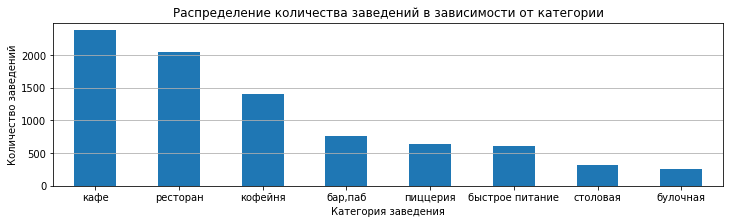

In [ ]:
# Строим столбчатую диаграмму
name_by_cat.plot(x = 'category',
                 y = 'count',
                 figsize=(12, 3),
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')

# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

- Из графика видно, что наибольше количество заведений относятся к категории Кафе 27% , вторую рестораны 24% и третью позицию с результатом 17% занимают Кофейня.

---

### Задача 2



Исследуем распределение количества заведений по административным районам Москвы

In [ ]:
# Посчитаем количества заведений по административным районам Москвы
name_by_area = df.groupby('district')['name'].count().rename('count').sort_values(ascending=False).reset_index()

# Посчитаем долю количества заведений по административным районам Москвы
name_by_area['%'] = round(name_by_area['count'] / name_by_area['count'].sum() * 100)

print(f'Количество  заведений по административным районам Москвы: ')
name_by_area

Количество  заведений по административным районам Москвы: 


,district,count,%
0,Центральный административный округ,2242,27.0
1,Северный административный округ,900,11.0
2,Южный административный округ,892,11.0
3,Северо-Восточный административный округ,891,11.0
4,Западный административный округ,851,10.0
5,Восточный административный округ,798,9.0
6,Юго-Восточный административный округ,714,8.0
7,Юго-Западный административный округ,709,8.0
8,Северо-Западный административный округ,409,5.0


<Figure size 648x288 with 0 Axes>

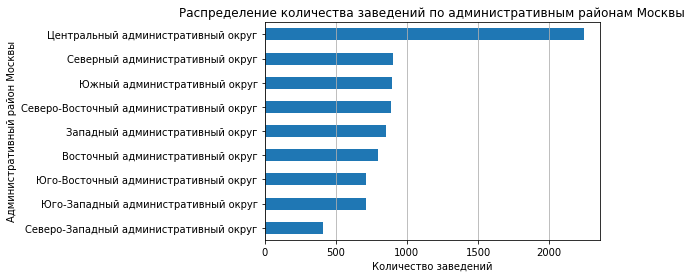

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(9, 4))

# Строим столбчатую диаграмму
name_by_area.sort_values('count').plot(x = 'district',
                                       y = 'count',
                                       kind = 'barh', # Тип графика - столбчатая диаграмма
                                       rot = 0, # Градус вращения подписи по оси Х
                                       legend = False, # Выключаем легенду
                                       title = f'Распределение количества заведений по административным районам Москвы'
                            )

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район Москвы') 

# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

- Больше всего заведений 27% расположено в ЦАО г.Москвы 

Исследуем распределение количества заведений по каждой категории в Центральном административном округе Москвы.

In [ ]:
# посчитаем количество заведений по категориям по центральному административному округу
cao_by_cat = df[df['district'] == 'Центральный административный округ']

# Группируем и сортируем по убыванию
cao_by_cat = cao_by_cat.groupby('category')['name'].count().rename('count').sort_values(ascending=False).reset_index()

# Посчитаем долю количества заведений в ЦАО Москвы
cao_by_cat['%'] = round(cao_by_cat['count'] / cao_by_cat['count'].sum() * 100)

print('Распределение заведений в Центральном административном округе Москвы: ')
cao_by_cat

Распределение заведений в Центральном административном округе Москвы: 


,category,count,%
0,ресторан,670,30.0
1,кафе,464,21.0
2,кофейня,428,19.0
3,"бар,паб",364,16.0
4,пиццерия,113,5.0
5,быстрое питание,87,4.0
6,столовая,66,3.0
7,булочная,50,2.0


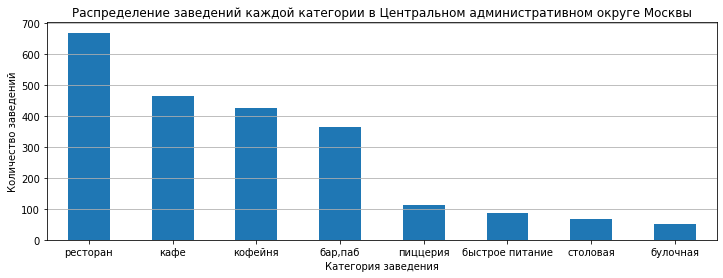

In [ ]:
# Строим столбчатую диаграмму 
cao_by_cat.plot(x = 'category',
                y = 'count',
                figsize = (12, 4),
                kind = 'bar', # Тип графика - столбчатая диаграмма
               rot = 0, # Градус вращения подписи по оси Х
               legend = False, # Выключаем легенду
               title = f'Распределение заведений каждой категории в Центральном административном округе Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')

# Добавляем сетку графика
plt.grid(axis = 'y')

# Выводим график
plt.show()

- В ЦАО г.Москвы больше всего заведений категории ресторан 30%, кафе 21%, кофейня 19%

---

### Задача 3



Изучим соотношение сетевых и несетевых заведений в целом по всем данным

0    5201
1    3205
Name: chain, dtype: int64


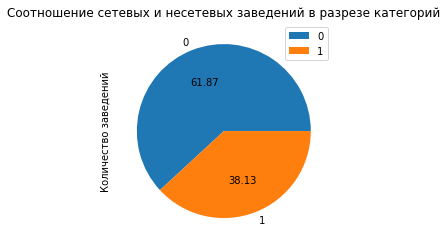

In [ ]:
# Построим график столбчатой диаграммы 
name_by_chain = df['chain'].value_counts()
name_by_chain.plot(  kind='pie',
                     title=f'Соотношение сетевых и несетевых заведений в разрезе категорий',
                     legend=True,
                     ylabel='Количество заведений',
                     xlabel='Признак сети \n (1=сеть \n 0= не сеть)',
                     rot=0,
                     autopct="%.2f",
                     figsize=(12, 4))
plt.grid(axis = 'y')
# Выводим график
print(name_by_chain)
plt.show()

- График показывает, что доля сетевых заведений составляет 38% от общего количества

Изучим соотношение сетевых и несетевых заведений в разрезе категорий заведения. 

In [ ]:
# Количество заведений по категориям
category_by_chain = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).reset_index()
# Доля сетевых в каждой категории
category_by_chain['Share_chain'] = round(category_by_chain[1] / (category_by_chain[0] + category_by_chain[1]), 2)
# Сортируем по доле сетевых заведений
category_by_chain = category_by_chain.sort_values(by='Share_chain', ascending=False)

category_by_chain

chain,category,0,1,Share_chain
1,булочная,99,157,0.61
5,пиццерия,303,330,0.52
4,кофейня,693,720,0.51
2,быстрое питание,371,232,0.38
6,ресторан,1313,730,0.36
3,кафе,1599,779,0.33
7,столовая,227,88,0.28
0,"бар,паб",596,169,0.22


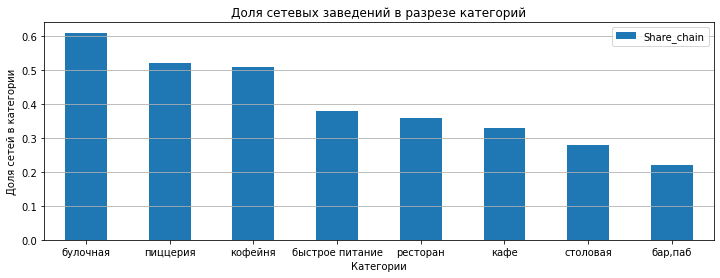

In [ ]:
# Построим график столбчатой диаграммы
category_by_chain.plot(  kind='bar',
                         x='category',
                         y='Share_chain',
                         title=f'Доля сетевых заведений в разрезе категорий',
                         legend=True,
                         ylabel='Доля сетей в категории',
                         xlabel='Категории',
                         rot=0,
                         figsize=(12, 4))
plt.grid(axis = 'y')

# Выводим график
plt.show()

- Более половины Булочных, Пиццерий и Кофеин чаще всего являются сетевыми

---

### Задача 4



Исследуем количество посадочных мест в заведениях.

In [ ]:
# Изучаем статистические показатели столбца score
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

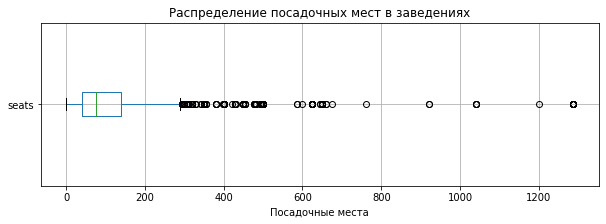

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 3))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение посадочных мест в заведениях')
plt.xlabel('Посадочные места')

# Выводим график
plt.show()

In [ ]:
# Определим медиану кол-ва постадочных мест по категориям
category_by_chain = df.groupby('category')['seats'].median().sort_values(ascending=False)

print('Медиана посадочных мест по категориям заведения')
category_by_chain

Медиана посадочных мест по категориям заведения


category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: Float64

- Распределение данных характеризуется широким разбросом и «хвостом» в правой части гистограммы. Такие высокие значения можно отнести к выбросам. Возможно это крупные сетевые фудкорты расчитанные на большой поток посетителей 

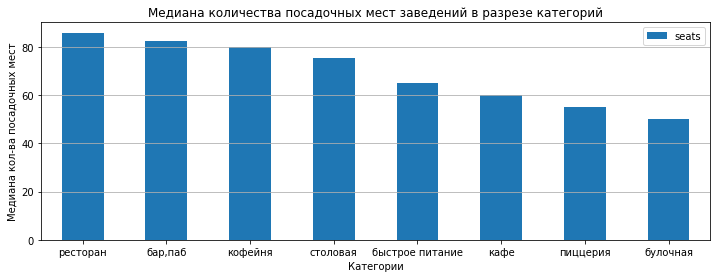

In [ ]:
# Построим график столбчатой диаграммы
category_by_chain.plot(  kind='bar',
                         title=f'Медиана количества посадочных мест заведений в разрезе категорий',
                         legend=True,
                         ylabel='Медиана кол-ва посадочных мест',
                         xlabel='Категории',
                         rot=0,
                         figsize=(12, 4))
plt.grid(axis = 'y')

# Выводим график
plt.show()

- Наибольшее значение медианы количества посадочных мест 86 в Ресторанах. В Барах,пабах 82. В Кафейнях 91

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Исследуем рейтинг заведений. 

In [ ]:
# Определим распределение средних рейтингов по категориям заведений.
category_by_chain = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print('Cредних рейтингов по категориям заведений:')
category_by_chain

Cредних рейтингов по категориям заведений:


category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float64

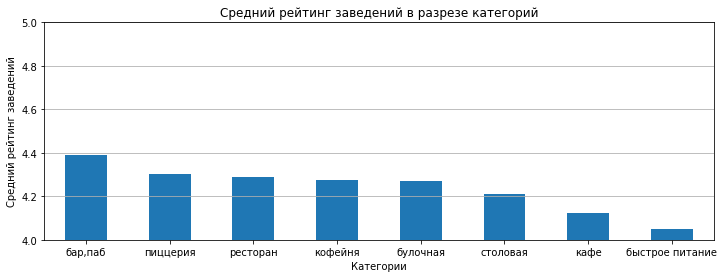

In [ ]:
# Построим график столбчатой диаграммы
category_by_chain.plot(kind='bar',
                       ylim = (4, 5),
                       title=f'Средний рейтинг заведений в разрезе категорий',
                       ylabel='Средний рейтинг заведений',
                       xlabel='Категории',
                       rot=0,
                       figsize=(12, 4))
plt.grid(axis = 'y')

# Выводим график
plt.show()

- Различие средних рейтингов по различным категориям заведений несущественно и находится в диапазоне 4.05 для быстрого питания до 4.38 для бар,паб

---

### Задача 6



Изучим корреляцию рейтингов заведений

In [ ]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Сортируем по убыванию значения матрицы для переменной rating
correlation_matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']]\
                    .sort_values(by='rating', ascending=False)

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


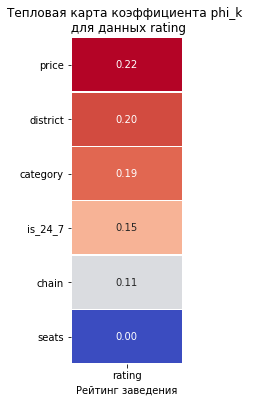

In [ ]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')
plt.yticks(rotation=0) 

# Выводим график
plt.show()

- самая сильная корреляция рейтинга наблюдается с ценовой категорией заведения

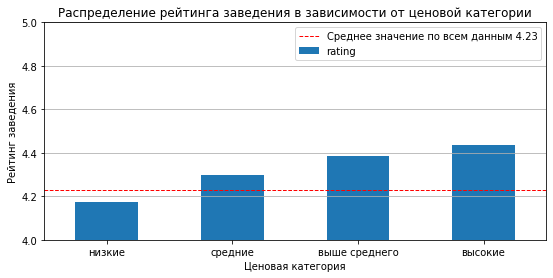

In [ ]:
# Строим график столбчатой диаграммы
grouped = df.groupby('price')['rating'].mean().sort_values()
grouped.plot(kind='bar',
               title=f'Распределение рейтинга заведения в зависимости от ценовой категории',
               legend=True,
               ylabel='Рейтинг заведения',
               xlabel='Ценовая категория',
               rot=0,
               ylim=(4, 5),
               figsize=(9, 4))

# Рассчитываем среднее значение по рейтингу заведения
mean_rating = df['rating'].mean()

# Наносим на график линию с средним значением рейтинга заведения
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Среднее значение по всем данным {round(mean_rating,2)}')

plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

- Из графика видно, что чем выше ценовая категория заведения тем выше рейтинг

---

### Задача 7



Найдём топ-15 популярных по кол-ву заведений сетей в Москве и для них посчитаем значения среднего рейтинга.

In [ ]:
# Сгруппируем данные и посчитаем среднее значение рейтинга для топ-15 популярных по количеству заведений сетей
gr_chain = df[df['chain']==1].groupby(['name', 'category'])['rating'].agg(['count', 'mean'])\
                             .rename(columns={'count': 'count_name', 'mean': 'avg_rating'})\
                             .sort_values(by='count_name', ascending=False)\
                             .reset_index()\
                             .head(15)

# Посчитаем долю количества заведений в ЦАО Москвы
gr_chain['%'] = round(gr_chain['count_name'] / gr_chain['count_name'].sum() * 100)

print('Топ-15 популярных сетей по количеству заведений в Москве:')
gr_chain

Топ-15 популярных сетей по количеству заведений в Москве:


,name,category,count_name,avg_rating,%
0,шоколадница,кофейня,119,4.178151,15.0
1,домино'с пицца,пиццерия,76,4.169737,10.0
2,додо пицца,пиццерия,74,4.286486,10.0
3,one price coffee,кофейня,71,4.064789,9.0
4,яндекс лавка,ресторан,69,3.872464,9.0
5,cofix,кофейня,65,4.075385,8.0
6,prime,ресторан,49,4.114286,6.0
7,кофепорт,кофейня,42,4.147619,5.0
8,кулинарная лавка братьев караваевых,кафе,39,4.394872,5.0
9,теремок,ресторан,36,4.105556,5.0


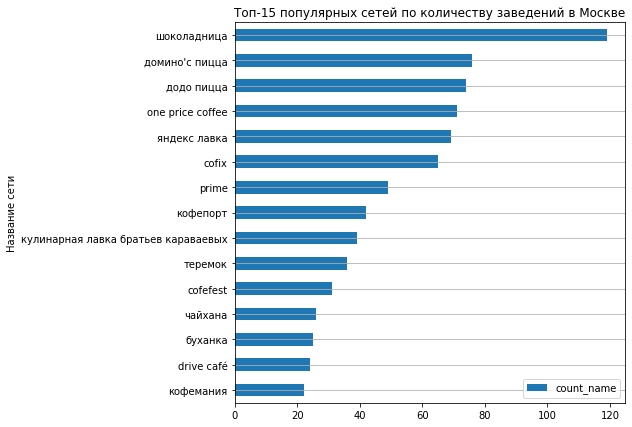

In [ ]:
# Строим график столбчатой диаграммы
grouped = gr_chain.sort_values(by='count_name')

grouped.plot(x='name',
             y='count_name',
             kind='barh',
               title=f'Топ-15 популярных сетей по количеству заведений в Москве',
               ylabel='Количество заведений в сети',
               xlabel='Название сети',
               rot=0,
               figsize=(7, 7))

plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

- самые популярные по количеству ТОП-15 заведений в Москве являются Шоколадница 15%, Додо пицца и Домино'с пицца с долей по 10% каждая. Они относятся к категории Кофейня и Пиццерия

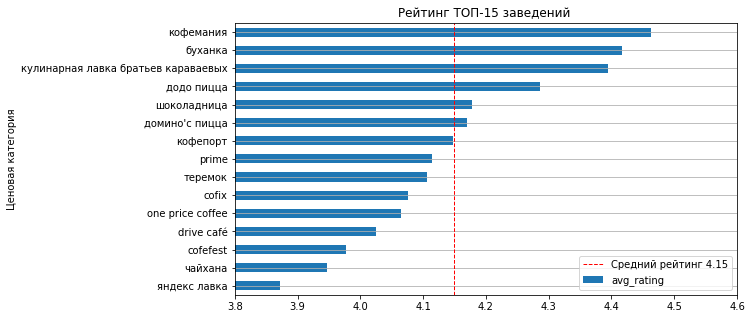

In [ ]:
# Строим график столбчатой диаграммы
grouped = gr_chain.sort_values(by='avg_rating')

grouped.plot(x='name',
             y='avg_rating',
             kind='barh',
               title=f'Рейтинг ТОП-15 заведений ',
               legend=True,
               ylabel='Рейтинг заведения',
               xlabel='Ценовая категория',
               rot=0,
               xlim=(3.8, 4.6),
               figsize=(9, 5))

# Рассчитываем среднее значение по рейтингу заведения
mean_rating = gr_chain['avg_rating'].mean()

# Наносим на график линию с средним значением рейтинга заведения
plt.axvline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг {round(mean_rating,2)}')

plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

- из графика видно, что из тройки лидеров ТОП-15 сетей по кол-ву заведений Шоколадница, Домино'с пицца и Додо пица имеет рейтинг выше среднего

---

### Задача 8



Изучим вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы

In [ ]:
gr_dist_by_bill = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values(by='mean')

print('Cредний чек заведения в зависимости от района Москвы:')
round(gr_dist_by_bill)

Cредний чек заведения в зависимости от района Москвы:


,mean,median
district,,
Юго-Восточный административный округ,654.0,450.0
Северо-Восточный административный округ,717.0,500.0
Юго-Западный административный округ,793.0,600.0
Восточный административный округ,821.0,575.0
Северо-Западный административный округ,822.0,700.0
Южный административный округ,834.0,500.0
Северный административный округ,928.0,650.0
Западный административный округ,1053.0,1000.0
Центральный административный округ,1191.0,1000.0


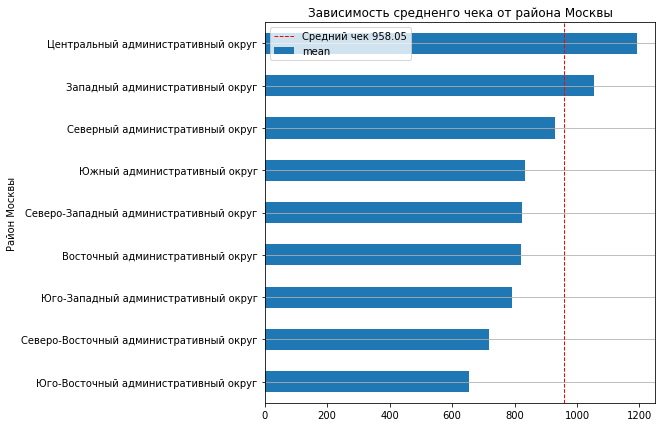

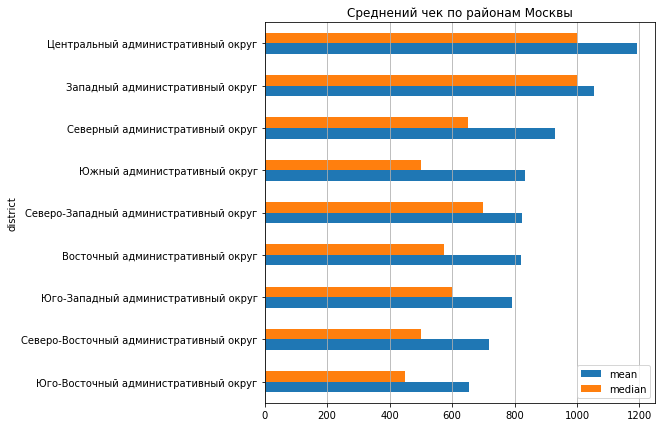

In [ ]:
# Строим график столбчатой диаграммы средней цены
gr_dist_by_bill.plot(  y='mean',
                       kind='barh',
                       title=f'Зависимость средненго чека от района Москвы',
                       ylabel='Средний чек',
                       xlabel='Район Москвы',
                       rot=0,
                       figsize=(7, 7))

# Рассчитываем среднее значение по среднему чеку
mean_bill = df['middle_avg_bill'].mean()

# Наносим на график линию с средним значением чека
plt.axvline(mean_bill, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний чек {round(mean_bill,2)}')


plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

# Построим график средней и медианнной цены
gr_dist_by_bill.plot(
                 kind='barh',
                 title=f'Среднений чек по районам Москвы',
                 ylabel='Средний чек',
#                  xlabel='Категория заведения',
                 rot=0,
                 figsize=(7, 7))
plt.grid(axis='x')
# Выводим график
plt.show()

- Самый высокий средний чек в Центральном и Западном АО Москвы. Для Восточных и Южных АО средний чек на 25-30% ниже

---
Проанализируем цены в Центральном административном округе

In [ ]:
# Расчитаем средний чек в Центральном административном округе по категориям заведений
cao_by_bill = df[df['district'] == 'Центральный административный округ']
cao_by_bill = cao_by_bill.groupby('category')['middle_avg_bill'].agg(['mean', 'median']).sort_values(by='mean')#ascending=False)

print('Среднй чек в Центральном административном округе по категориям заведений:')
round(cao_by_bill)

Среднй чек в Центральном административном округе по категориям заведений:


,mean,median
category,,
столовая,320.0,300.0
быстрое питание,532.0,450.0
кафе,765.0,700.0
кофейня,795.0,500.0
пиццерия,1105.0,1000.0
булочная,1238.0,962.0
"бар,паб",1480.0,1250.0
ресторан,1561.0,1250.0


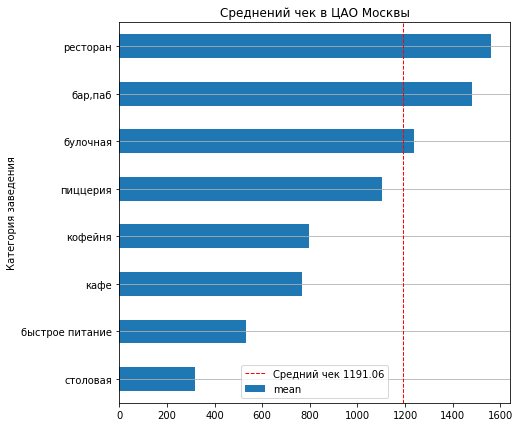

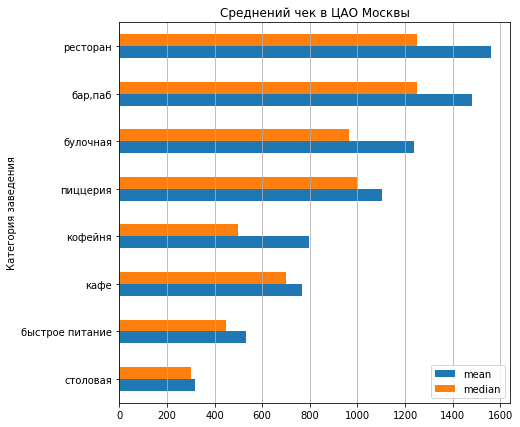

In [ ]:
# Построим график с средней ценой чека
cao_by_bill.plot(y='mean',
                 kind='barh',
                 title=f'Среднений чек в ЦАО Москвы',
                 ylabel='Средний чек',
                 xlabel='Категория заведения',
                 rot=0,
                 figsize=(7, 7))

# Рассчитываем среднее значение по среднему чеку
mean_bill = df[df['district'] == 'Центральный административный округ']['middle_avg_bill'].mean()

# Наносим на график линию с средним значением чека
plt.axvline(mean_bill, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний чек {round(mean_bill,2)}')


plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

# Построим график со средней и медианной ценой чека
cao_by_bill.plot(
                 kind='barh',
                 title=f'Среднений чек в ЦАО Москвы',
                 ylabel='Средний чек',
                 xlabel='Категория заведения',
                 rot=0,
                 figsize=(7, 7))
plt.grid(axis='x')
# Выводим график
plt.show()

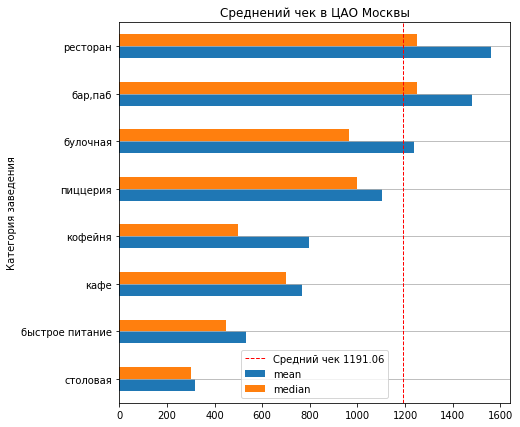

In [ ]:
cao_by_bill.plot(
                 kind='barh',
                 title=f'Среднений чек в ЦАО Москвы',
                 ylabel='Средний чек',
                 xlabel='Категория заведения',
                 rot=0,
                 figsize=(7, 7))

# Рассчитываем среднее значение по среднему чеку
mean_bill = df[df['district'] == 'Центральный административный округ']['middle_avg_bill'].mean()

# Наносим на график линию с средним значением чека
plt.axvline(mean_bill, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний чек {round(mean_bill,2)}')


plt.grid(axis='x')
plt.grid()
plt.legend()

# Выводим график
plt.show()

- Для ЦАО самый высокий средний чек у Ресторанов, затем идут Бары,пабы и булочные, средний чек которых выше среднего по всему ЦАО


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Анализ взаимосвязи данных показал, что:

- Наибольше количество заведений относятся к категории Кафе 27% , вторую рестораны 24% и третью позицию с результатом 17% занимают Кофейня.
- Больше всего заведений 27% расположено в ЦАО г.Москвы
- В ЦАО г.Москвы больше всего заведений категории ресторан 30%, кафе 21%, кофейня 19%
- Доля сетевых заведений составляет 38% от общего количества заведений
- Более половины Булочных, Пиццерий и Кофеин чаще всего являются сетевыми
- Наибольшее значение медианы количества посадочных мест 86 в Ресторанах. В Барах,пабах 82. В Кафейнях 91 
- Различие средних рейтингов по различным категориям заведений несущественно и находится в диапазоне 4.05 для быстрого питания до 4.38 для бар,паб
- Самая сильная корреляция рейтинга заведений наблюдается с ценовой категорией заведения. Чем выше ценовая категория заведения тем выше рейтинг 
- Самые популярные по количеству ТОП-15 заведений в Москве являются Шоколадница 15%, Додо пицца и Домино'с пицца с долей по 10% каждая. Они относятся к категории Кофейня и Пиццерия
- Из тройки лидеров ТОП-15 сетей по кол-ву заведений Шоколадница, Домино'с пицца и Додо пица имеет рейтинг выше среднего
- Самый высокий средний чек в Центральном и Западном АО Москвы. Для Восточных и Южных АО средний чек на 25-30% ниже
- Для ЦАО самый высокий средний чек у Ресторанов, затем идут Бары,пабы и булочные средний чек которых выше среднего по всему ЦАО

## 4. Итоговый вывод и рекомендации



**Общий обзор проделанной работы.**  
В ходе исследования были проанализированы данные с заведениями общественного питания Москвы, составленного на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.  
**Ответы на исследовательские вопросы**    
Большенство заведений находится в ЦАО, где чек выше среднего. Количество сетевых заведений менее половины 38%.Среднее количество посадочных мест 60-80. Больше всего в Москве кафе, а среди сетей преобладают рестораны.  
**Рекомендации на основе анализа данных**  
В качестве рекомендаций стоит обратить внимание на кофетерии и пицерии в ЦАО количество конкурентов не так высоко, а средний чек и проходимость выше среднего.